<a href="https://colab.research.google.com/github/N00B-MA5TER/ML-Projects/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Including the dependencies**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Data Collection and Processing**

In [2]:
# loading the csv data to a Pandas Dataframe
heart_data = pd.read_csv('/content/heart_disease_data.csv')

In [3]:
# printing the first five rows
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# printing the last five rows
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# getting some basic info about the dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# checking for empty values in columns
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
# statistical analysis
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# number of rows and columns
heart_data.shape

(303, 14)

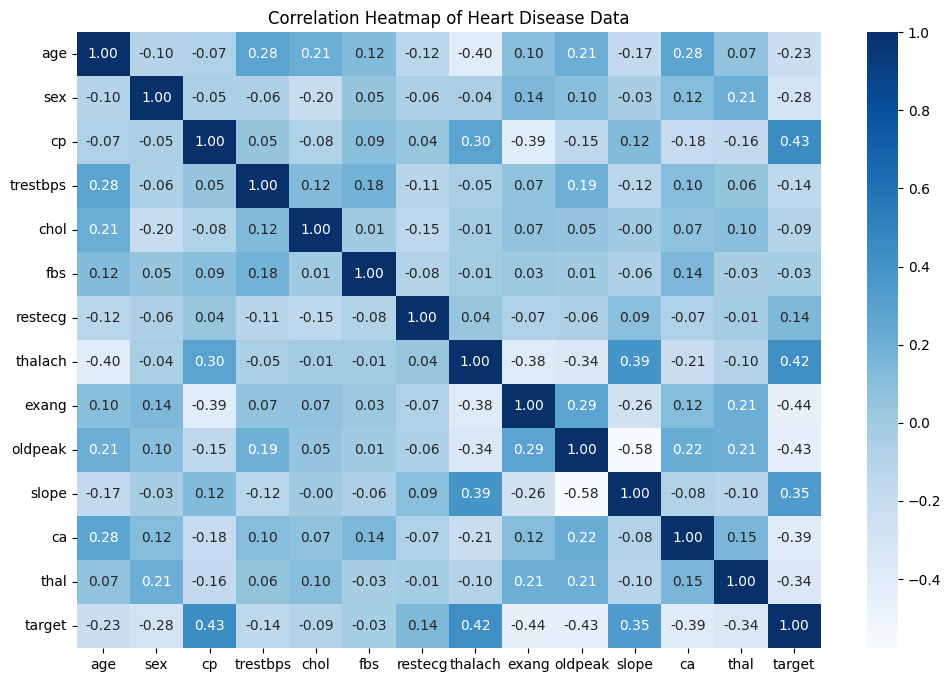

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(heart_data.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap of Heart Disease Data')
plt.show()

In [9]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

,count
target,
1,165
0,138


**1 : Defective Heart**

**2 : Healthy Heart**

**Splitting the features and the target**

In [10]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [11]:
print(X, Y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

**Splitting the data into testing and training data**

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [13]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


**Model Training : Logistic Regression**

In [14]:
model = LogisticRegression()

In [15]:
# training the model with training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Model Evaluation : Accuracy Score**

In [16]:
# accuracy on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [17]:
print("Accuracy on training data : ", training_data_accuracy)

Accuracy on training data :  0.8512396694214877


In [18]:
# accuracy on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [19]:
print("Accuracy on test data : ", test_data_accuracy)

Accuracy on test data :  0.819672131147541


**Making a Predictive System**

In [20]:
input_data = (44,1,1,120,263,0,1,173,0,0,2,0,3)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Saving the trained model**

In [21]:
import pickle

In [22]:
filename = "Heart_disease_trained_model.sav"
pickle.dump(model, open(filename, 'wb'))

In [23]:
# loading the saved model
loaded_model = pickle.load(open('Heart_disease_trained_model.sav', 'rb'))

In [24]:
input_data = (44,1,1,120,263,0,1,173,0,0,2,0,3)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [26]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, Y_train)

X_train_prediction_svm = svm_model.predict(X_train)
training_data_accuracy_svm = accuracy_score(X_train_prediction_svm, Y_train)

X_test_prediction_svm = svm_model.predict(X_test)
test_data_accuracy_svm = accuracy_score(X_test_prediction_svm, Y_test)

print("Accuracy on training data (SVM): ", training_data_accuracy_svm)
print("Accuracy on test data (SVM): ", test_data_accuracy_svm)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

X_train_prediction_dt = dt_model.predict(X_train)
training_data_accuracy_dt = accuracy_score(X_train_prediction_dt, Y_train)

X_test_prediction_dt = dt_model.predict(X_test)
test_data_accuracy_dt = accuracy_score(X_test_prediction_dt, Y_test)

print("\nAccuracy on training data (Decision Tree): ", training_data_accuracy_dt)
print("Accuracy on test data (Decision Tree): ", test_data_accuracy_dt)

Accuracy on training data (SVM):  0.6942148760330579
Accuracy on test data (SVM):  0.6229508196721312

Accuracy on training data (Decision Tree):  1.0
Accuracy on test data (Decision Tree):  0.7868852459016393


### Feature Scaling
Scaling features is important for Logistic Regression because it is sensitive to the magnitude of the input features. We will use `StandardScaler` to standardize the features.

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Retrain and Evaluate Logistic Regression Model with Scaled Data
Now, let's retrain the Logistic Regression model using the scaled data and evaluate its accuracy again.

In [28]:
scaled_model = LogisticRegression()
scaled_model.fit(X_train_scaled, Y_train)

X_train_prediction_scaled = scaled_model.predict(X_train_scaled)
training_data_accuracy_scaled = accuracy_score(X_train_prediction_scaled, Y_train)

X_test_prediction_scaled = scaled_model.predict(X_test_scaled)
test_data_accuracy_scaled = accuracy_score(X_test_prediction_scaled, Y_test)

print("Accuracy on training data (Scaled Logistic Regression): ", training_data_accuracy_scaled)
print("Accuracy on test data (Scaled Logistic Regression): ", test_data_accuracy_scaled)

Accuracy on training data (Scaled Logistic Regression):  0.8471074380165289
Accuracy on test data (Scaled Logistic Regression):  0.7868852459016393
